In [244]:
import pandas as pd
import numpy as np


In [245]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
                  

In [246]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [247]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [248]:
#Good Info
#df[['First Name','Second Name']]=df['Full Name'].str.split(' ',expand=True)
#df=df.append(df2,sort=True)
#df2.set_index('email',inplace=True)
#df['Column A']=df['Column A'].fillna(2.0)

In [249]:
#data=training.append(test,sort=True)

train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [250]:
train.set_index('PassengerId',inplace=True)
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [251]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [252]:
#Numerical features to consider Age
import matplotlib.pyplot as plt


In [253]:
#Age distributiondata['Age']
train['Age']=train['Age'].fillna(train['Age'].median())
train['Age']
# data.Age.apply(lambda x: 0 == pd.isna(x))

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    28.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

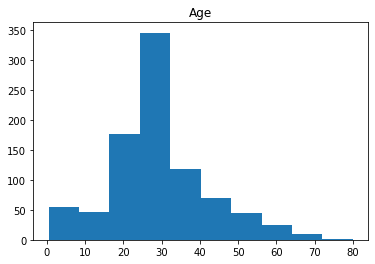

In [254]:
plt.hist(train['Age'])
plt.title('Age')
plt.show()

In [255]:
#Average age that survived and died 
pd.pivot_table(train, index = 'Survived', values = ['Age'])

,Age
Survived,
0,30.028233
1,28.291433


Text(0.5, 1.0, 'Sex')

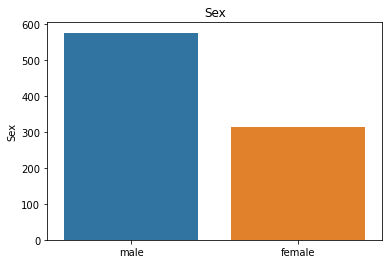

In [256]:
#Categorical features to consider Sex,PClass
import seaborn as sns 
sns.barplot(train['Sex'].value_counts().index,train['Sex'].value_counts()).set_title('Sex')


In [257]:
pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = ['Ticket'] ,aggfunc ='count')

Ticket     
Sex      female male
Survived            
0            81  468
1           233  109

In [258]:
pd.pivot_table(data, index = 'Survived', values = ['Sex'],aggfunc ='count')

,Sex
Survived,
0.0,549
1.0,342


Text(0.5, 1.0, 'Pclass')

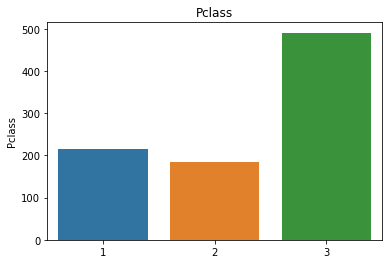

In [259]:
sns.barplot(train['Pclass'].value_counts().index,train['Pclass'].value_counts()).set_title('Pclass')

In [260]:
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = ['Ticket'] ,aggfunc ='count')

Ticket         
Pclass        1   2    3
Survived                
0            80  97  372
1           136  87  119

In [261]:
train.dropna(subset=['Embarked'],inplace = True)

Text(0.5, 1.0, 'Embarked')

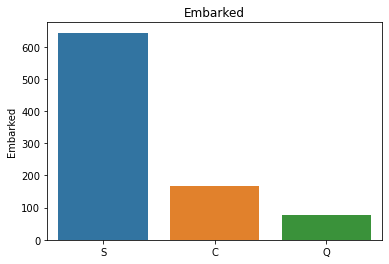

In [262]:
sns.barplot(train['Embarked'].value_counts().index,train['Embarked'].value_counts()).set_title('Embarked')

In [263]:
pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = ['Ticket'] ,aggfunc ='count')

Ticket         
Embarked      C   Q    S
Survived                
0            75  47  427
1            93  30  217

In [264]:
train['Cabin']=train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['Cabin']

PassengerId
1      0
2      1
3      0
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Cabin, Length: 889, dtype: int64

In [265]:
pd.pivot_table(train, index = 'Survived', columns = 'Cabin', values = ['Ticket'] ,aggfunc ='count')

Ticket                      
Cabin         0      1    2    3    4
Survived                             
0         481.0   58.0  7.0  3.0  NaN
1         206.0  120.0  9.0  3.0  2.0

In [266]:
train.Cabin.head(10)

PassengerId
1     0
2     1
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    0
Name: Cabin, dtype: int64

In [267]:
train['Fare'] = np.log(train.Fare+1)
train['Fare']

PassengerId
1      2.110213
2      4.280593
3      2.188856
4      3.990834
5      2.202765
         ...   
887    2.639057
888    3.433987
889    3.196630
890    3.433987
891    2.169054
Name: Fare, Length: 889, dtype: float64

In [268]:
pd.pivot_table(train, index = 'Survived', values = ['Fare'])

,Fare
Survived,
0,2.710095
1,3.360971


In [269]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,1,C


In [270]:
train.Pclass = train.Pclass.astype(str)

In [271]:
X_train = pd.get_dummies(train[['Pclass','Sex','Age',
                                        'Fare','Embarked','Cabin']])


In [272]:
X_train.head(5)

,Age,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,22.0,2.110213,0,0,0,1,0,1,0,0,1
2,38.0,4.280593,1,1,0,0,1,0,1,0,0
3,26.0,2.188856,0,0,0,1,1,0,0,0,1
4,35.0,3.990834,1,1,0,0,1,0,0,0,1
5,35.0,2.202765,0,0,0,1,0,1,0,0,1


In [273]:
y_train = train.Survived
y_train


PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 889, dtype: int64

In [281]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scale = StandardScaler()
X_train= X_train.copy()
X_train= scale.fit_transform(X_train)
X_train


array([[-0.56367407, -0.87759093, -0.48590539, ..., -0.48271079,
        -0.30794088,  0.61679395],
       [ 0.66921696,  1.36637963,  1.3444755 , ...,  2.07163382,
        -0.30794088, -1.62128697],
       [-0.25545131, -0.79628127, -0.48590539, ..., -0.48271079,
        -0.30794088,  0.61679395],
       ...,
       [-0.10133993,  0.24566301, -0.48590539, ..., -0.48271079,
        -0.30794088,  0.61679395],
       [-0.25545131,  0.49106801,  1.3444755 , ...,  2.07163382,
        -0.30794088, -1.62128697],
       [ 0.20688282, -0.81675534, -0.48590539, ..., -0.48271079,
         3.24737656, -1.62128697]])

In [282]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.69662921 0.74157303 0.74719101 0.78651685 0.77966102]
0.7503142258617407


In [283]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.81460674 0.79775281 0.78089888 0.8079096 ]
0.7964133815781121


In [284]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.76966292 0.8258427  0.80337079 0.8079096 ]
0.8065257411286739


In [285]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.79213483 0.83707865 0.78089888 0.83050847]
0.8043039421062655


In [286]:
from sklearn.svm import SVC
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.81460674 0.8258427  0.78089888 0.81920904]
0.8099092236399417


In [288]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())


[0.79775281 0.81460674 0.83707865 0.79213483 0.85310734]
0.8189360756681265


In [295]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators = [('xgb',xgb)], voting = 'soft') 
voting_classifier

VotingClassifier(estimators=[('xgb',
                              GradientBoostingClassifier(random_state=1))],
                 voting='soft')

In [ ]:
test.head(2)

In [ ]:
test = test[['Pclass','Sex','Age','PassengerId','Fare','Embarked','Cabin']]

In [ ]:
test.set_index('PassengerId',inplace=True)
test.info()

In [ ]:
test['Age']=test['Age'].fillna(test['Age'].median())
test['Fare'] = np.log(test.Fare+1)
test['Fare']=test['Fare'].fillna(test['Fare'].median())
test['Cabin']=test.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [ ]:
test.info()


In [ ]:
test.Pclass = test.Pclass.astype(str)

In [ ]:
X_test = pd.get_dummies(test[['Pclass','Sex','Age',
                                        'Fare','Embarked','Cabin']])

In [ ]:
X_test.head(2)

In [ ]:
X_test= X_test.copy()
X_test= scale.fit_transform(X_test)
X_test

In [296]:
voting_classifier.fit(X_train,y_train)
predict_result = voting_classifier.predict(X_test).astype(int)
submission = {'PassengerId': test.index, 'Survived': predict_result}
submission = pd.DataFrame(data=submission)
submission.to_csv('xgbOnly.csv', index=False)